# Illinois Men's Gymnastics Strength Test Analysis

## Introduction

A collaborative venture with coach Mike Freeze of the University of Illinois, this is an in-depth analysis of the Illini Men's Gymnastics athletes strength test performance over summer training camp in July 2023. Focusing on two tests, Drop Jumps and Isometric Mid-Thigh Pulls, we leveraged the Hawkin Dynamics system to gather multifaceted data beyond force output to better understand strength trends over time and develop actionable training recommendations to elevate athletic performance for important meets. 

In this initial analysis, the emphasis is on identifying influential variables in the dataset that predict the key metrics of the tests, aiming to better recognize signs of strain or over-training among athletes.

## Data

Importing the dataset below.

In [347]:
# imports
import pandas as pd
import numpy as np
import glob, os

import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
# read data files
folder_path_DJ = 'Drop Jump Data'
folder_path_ISO = 'Isometric Test Data' 
csv_files_DJ = glob.glob(os.path.join(folder_path_DJ, '*.csv'))
csv_files_ISO = glob.glob(os.path.join(folder_path_ISO, '*.csv'))

# generate test dataframes
DJ = pd.concat((pd.read_csv(file) for file in csv_files_DJ), ignore_index = True)
ISO = pd.concat((pd.read_csv(file) for file in csv_files_ISO), ignore_index = True)

In [349]:
# preview
DJ.head()
ISO.head()

,TestId,Date,Time,Name,Segment,Position,Type,Excluded,Tags,System Weight,...,Net Force at 250 ms,Relative Force at 250 ms,Relative Force at 250 ms (BW),RFD 0-250 ms,Left Force at 250 ms,Right Force at 250 ms,Impulse 0-250ms,Net Impulse 0-250ms,Length of Pull,Time to Peak Force
0,uoQyU9SpPmzu1Zj69KI2,07/31/2023,08:44:30,Amari Sewell,NaN,All-Around,Isometric Test,NaN,Mid-Thigh Pull,967.249,...,949.751,198.1910,289.7254,3656,948,969,368.6425,127.3139,2.540,1.698
1,B1SU3xGanPbCmJ9gO0wN,07/31/2023,08:48:28,Brandon Dang,NaN,AA,Isometric Test,NaN,Mid-Thigh Pull,845.925,...,595.075,170.3461,243.5607,2288,704,737,291.7095,80.6512,2.389,2.368
2,mBwLS2x05dnO3tDe9L62,07/31/2023,08:46:47,Connor McCool,NaN,"Floor, Vault",Isometric Test,NaN,Mid-Thigh Pull,1068.410,...,1120.590,204.8839,263.1965,4328,1142,1047,373.7395,107.1712,2.526,1.706
3,OC8egB9Bm2yAwanpEIGc,07/31/2023,08:53:21,Connor Micklos,NaN,All-Around,Isometric Test,NaN,Mid-Thigh Pull,899.871,...,342.129,138.0198,195.2677,1288,710,532,324.7280,100.2102,2.559,1.523
4,YgNQxOyJnHbHAkwcG0RS,07/31/2023,08:45:13,Dylan Shepard,NaN,AA,Isometric Test,NaN,Mid-Thigh Pull,828.102,...,528.898,163.8687,231.2807,1956,692,665,311.9760,105.3646,2.318,2.121


Viewing all the variables next.

In [350]:
# columns
print("Drop Jump Variables:", DJ.columns)
print("Isometric Test Variables:", ISO.columns)

Drop Jump Variables: Index(['TestId', 'Date', 'Time', 'Name', 'Segment', 'Position', 'Type',
       'Excluded', 'Tags', 'System Weight', 'Drop Height', 'Jump Height',
       'Spring Like Correlation', 'Impact Peak', 'Time to Peak Braking Force',
       'Stiffness', 'mRSI', 'RSI', 'Jump Momentum', 'Peak Braking Force',
       'Peak Relative Braking Force', 'Avg. Braking Force',
       'Avg. Relative Braking Force', 'Braking Impulse',
       'Relative Braking Impulse', 'Braking Net Impulse',
       'Relative Braking Net Impulse', 'Peak Propulsive Force',
       'Peak Relative Propulsive Force', 'Avg. Propulsive Force',
       'Avg. Relative Propulsive Force', 'Propulsive Impulse',
       'Relative Propulsive Impulse', 'Propulsive Net Impulse',
       'Relative Propulsive Net Impulse', 'Braking Phase', 'Braking Phase %',
       'Propulsive Phase', 'Propulsive Phase %', 'Time To Takeoff',
       'Flight Time', 'Contact Time', 'Positive Impulse',
       'Positive Net Impulse', 'Net Impulse 

Viewing the variable lists shows the tests measure key metrics and variations of those measures - knowing the individual factors in each test is beneficial during the modeling process. 

**Drop Jump Measures and Variables** 

The drop jump test is designed to test reactivity. The athlete begins by standing on a platform behind the force plates, stepping off and dropping onto the plates, absorbing the drop and immediately leaping again. The goal is to measure how fast the athlete shifts from force absorption to propulsion. Target metrics include Jump Height and Reactive Strength Index (RSI).

The variables can be categorized into phases of the test -

Identifiers 

* `TestId`
* `Date`
* `Time`
* `Name`
* `Type`


DROP Phase - lasts from test start until athlete contacts the plates

General Measurements

* `System Weight`
* `Drop Height`
* `Jump Height`

Braking phase - begins immediately after contact with plates. Consists of athlete loading force onto their legs in preparation for taking off (eccentric)

* Braking Force -  `Avg. Braking Force`, `Avg. Relative Braking Force`, `Avg. Braking RFD`, `Left Avg. Braking RFD`, `Right Avg. Braking RFD`, `L|R Peak Braking Force`, `L|R Avg. Braking Force`, `L|R Avg. Braking RFD`, `Right Force at Peak Braking Force`, `Left Force at Peak Braking Force`, `Time to Peak Braking Force`
* Braking Impulse - `Braking Impulse`, `Relative Braking Impulse`, `Braking Net Impulse`, `Relative Braking Net Impulse`, `L|R Braking Impulse Index`
* Braking Velocity - `Avg. Braking Velocity`
* Braking Power - `Avg. Braking Power`, `Avg. Relative Braking Power`, `Peak Braking Power`, `Peak Relative Braking Power`
* Braking Phase Timing - `Braking Phase`, `Braking Phase %`

Propulsive phase - starts when velocity hits 0 on the plates and continues until the athlete takes off (concentric)

* Propulsive Force - `Avg. Propulsive Force`, `Avg. Relative Propulsive Force`, `L|R Peak Propulsive Force`, `L|R Avg. Propulsive Force`
* Propulsive Impulse - `Propulsive Impulse`, `Relative Propulsive Impulse`, `Propulsive Net Impulse`, `Relative Propulsive Net Impulse`, `L|R Propulsive Impulse Index`
* Propulsive Velocity - `Avg. Propulsive Velocity`
* Propulsive Power - `Avg. Propulsive Power`, `Avg. Relative Propulsive Power`, `Avg. Relative Propulsive Power`, `Peak Relative Propulsive Power`
* Propulsive Phase Timing - `Propulsive Phase`, `Propulsive Phase %`
* `Time to Takeoff`
* `Contact Time`
* Reactive Strength Index - `mRSI`, `RSI`

Flight phase - segment of the test for which athlete is airborne after the drop jump

* `Takeoff Velocity`
* `Flight Time`

Landing phase - athlete lands back on the plate after the jump

* Landing Force - `Avg. Landing Force`, `Relative Peak Landing Force`, `L|R Peak Landing Force`, `L|R Avg. Landing Force`, `Left Force at Peak Landing Force`, `Right Force at Peak Landing Force`
* Landing Impulse - `L|R Landing Impulse Index`

Stability

* `Impact Peak`
* `Stiffness`
* `Spring Like Correlation`
* `Countermovement Depth`
* `Jump Momentum`

Other

* `Segment`
* `Position`
* `Excluded`
* `Tags`

**Isometric Test Measures and Variables**

The isometric mid-thigh pull test is designed to measure absolute force production, as research shows max isometric force is greater than max concentric force production. The test is set up with the athlete on the force plates gripping the bar. They then pull the bar to mid-thigh height and hold the position for 3 seconds. To measure how rapidly the athlete can reach max force, target metrics such as Rate of Force Development (RFD) are considered alongside Peak Force.

The measures are divided into 50ms phases - 

Identifiers

* `TestId`
* `Date`
* `Time`
* `Name`

General Measurements 

* `System Weight`
* `Length of Pull`

Force

* Peak Force - `Peak Force`, `Net Peak Force`, `Relative Peak Force`, `Relative Peak Force (BW)`, `L|R Peak Force`, `Left Peak Force`, `Right Peak Force`
* Force at 0 ms - `Force at 0 ms`, `Net Force at 0 ms`, `Relative Force at 0 ms`, `Relative Force at 0 ms (BW)`, `Left Force at 0 ms`, `Right Force at 0 ms`
* Force at 50 ms - `Force at 50 ms`, `Net Force at 50 ms`, `Relative Force at 50 ms`, `Relative Force at 50 ms (BW)`, `Left Force at 50 ms`, `Right Force at 50 ms`
* Force at 100 ms - `Force at 100 ms`, `Net Force at 100 ms`, `Relative Force at 100 ms`, `Relative Force at 100 ms (BW)`, `Left Force at 100 ms`, `Right Force at 100 ms`
* Force at 150 ms - `Force at 150 ms`, `Net Force at 150 ms`, `Relative Force at 150 ms`, `Relative Force at 150 ms (BW)`, `Left Force at 150 ms`, `Right Force at 150 ms`
* Force at 200 ms - `Force at 200 ms`, `Net Force at 200 ms`, `Relative Force at 200 ms`, `Relative Force at 200 ms (BW)`, `Left Force at 200 ms`, `Right Force at 200 ms`
* Force at 250 ms - `Force at 250 ms`, `Net Force at 250 ms`, `Relative Force at 250 ms`, `Relative Force at 250 ms (BW)`, `Left Force at 250 ms`, `Right Force at 250 ms`

Rate of Force Development and Impulse

* `Time to Peak Force`
* RFD 0-50 ms - `RFD 0-50 ms`, `Impulse 0-50ms`, `Net Impulse 0-50ms`
* RFD 0-100 ms - `RFD 0-100 ms`, `Impulse 0-100ms`, `Net Impulse 0-100ms`
* RFD 0-150 ms - `RFD 0-150 ms`, `Impulse 0-150ms`, `Net Impulse 0-150ms`
* RFD 0-200 ms - `RFD 0-200 ms`, `Impulse 0-200ms`, `Net Impulse 0-200ms`
* RFD 0-250 ms - `RFD 0-250 ms`, `Impulse 0-250ms`, `Net Impulse 0-250ms`

Other

* `Initiation Threshold`
* `Segment`
* `Position`
* `Excluded`
* `Tags`


## EDA

Visualizing the team progress in the target metrics for each test:

**Drop Jump** - `Jump Height`, `RSI`

**Isometric Test** - `Peak Force`, `Peak RFD`

In [466]:
# date time formatting
DJ['Date'] = pd.to_datetime(DJ['Date'])
ISO['Date'] = pd.to_datetime(ISO['Date'])
DJ = DJ.sort_values(by = 'Date')
ISO = ISO.sort_values(by = 'Date')

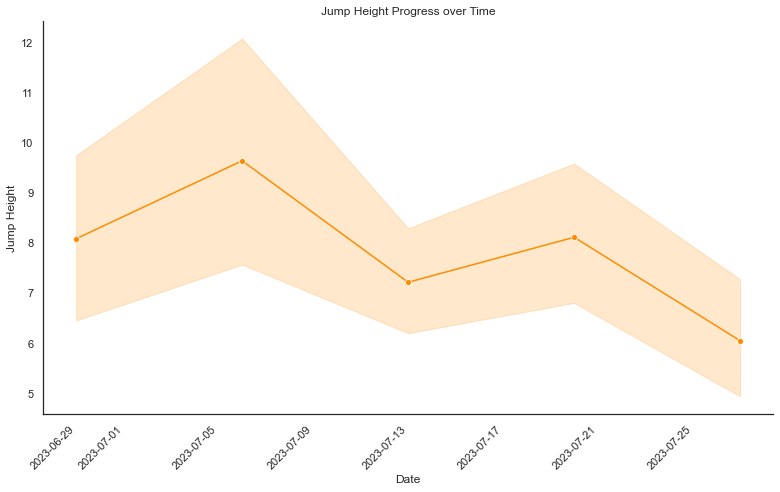

In [352]:
# jump height visual
sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.lineplot(x = 'Date', y = 'Jump Height', data = DJ, marker = "o", color = "darkorange")

sns.despine()

plt.xlabel('Date')
plt.ylabel('Jump Height')
plt.title('Jump Height Progress over Time')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

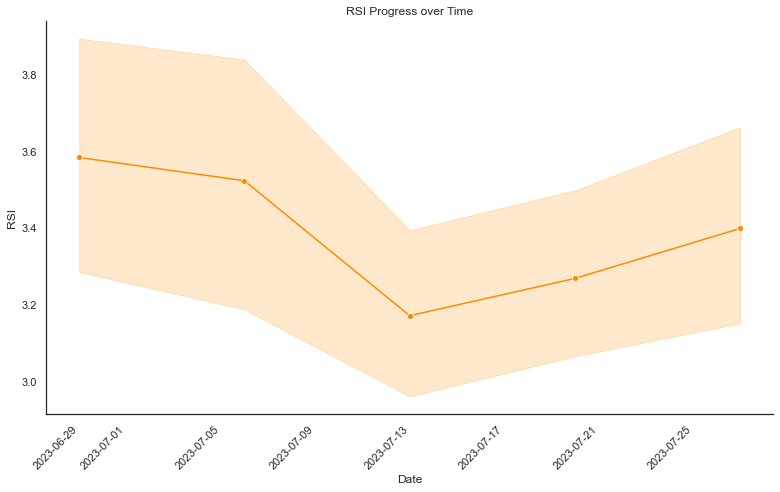

In [459]:
# RSI visual
plt.figure(figsize = (11, 7))

ax = sns.lineplot(x = 'Date', y = 'RSI', data = DJ, marker = 'o', color = "darkorange")

sns.despine()

plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('RSI Progress over Time')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

Observing mean `Jump Height` and `RSI` over testing dates shows the athletes' performance generally peaked at the start of July, though RSI recovered to near-peak levels by the end of the month.

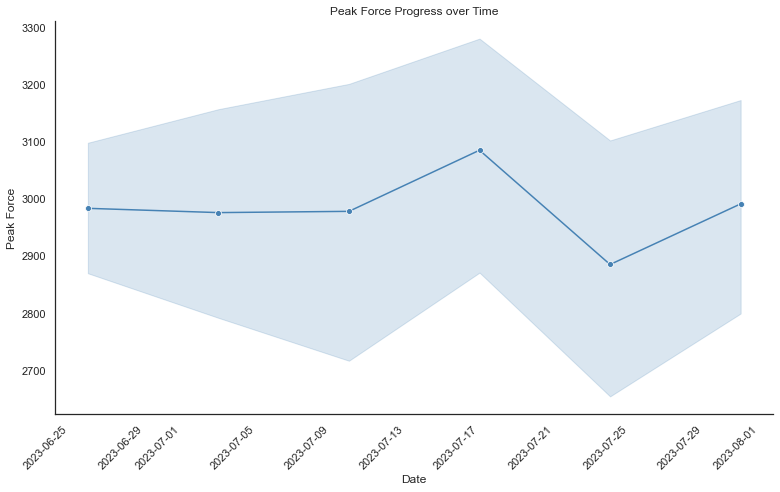

In [442]:
# peak force visual
plt.figure(figsize = (11, 7))

ax = sns.lineplot(x = 'Date', y = 'Peak Force', data = ISO, marker = 'o', color = "steelblue" )

sns.despine()

plt.xlabel('Date')
plt.ylabel('Peak Force')
plt.title('Peak Force Progress over Time')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

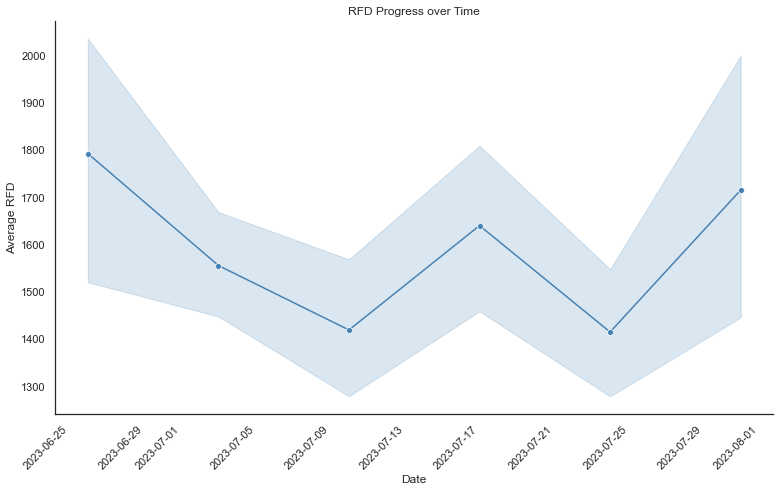

In [443]:
# RFD visual
ISO['Peak RFD'] = ISO['Peak Force'] / ISO['Time to Peak Force']

plt.figure(figsize = (11, 7))

ax = sns.lineplot(x = 'Date', y = 'Peak RFD', data = ISO, marker = 'o', color = "steelblue" )

sns.despine()

plt.xlabel('Date')
plt.ylabel('Average RFD')
plt.title('RFD Progress over Time')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()


For the Isometric Test, there is no default measure for rate of peak force development, so I've created a column that calculates this (`Peak RFD` = `Peak Force` / `Time to Peak Force`).

Viewing mean `Peak Force` and `RFD`, both spike in mid-July and late July, but remain mostly constant throughout the duration of the training program.

Understanding trends in target variables is important as it provides a basis of comparison once significant related variables are identified.

Viewing correlations to see if there are any strong linear relationships between feature types.

In [357]:
# drop jump correlation matrix
corr_DJ = DJ.corr()
corr_DJ

,Segment,Excluded,Tags,System Weight,Drop Height,Jump Height,Spring Like Correlation,Time to Peak Braking Force,Stiffness,mRSI,...,Right Force at Peak Landing Force,L|R Avg. Landing Force,Left Avg. Landing Force,Right Avg. Landing Force,L|R Landing Impulse Index,Avg. Braking Velocity,Avg. Propulsive Velocity,Countermovement Depth,Right Force at Peak Braking Force,Left Force at Peak Braking Force
Segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excluded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
System Weight,NaN,NaN,NaN,1.000000,NaN,-0.197057,0.171532,0.289068,-0.045827,-0.272614,...,-0.249538,0.129364,0.367613,0.275022,0.347238,0.004177,-0.218704,NaN,0.231486,0.342440
Drop Height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Avg. Braking Velocity,NaN,NaN,NaN,0.004177,NaN,-0.071516,0.430175,-0.459994,0.522491,-0.297055,...,0.109910,-0.019139,-0.025406,-0.083762,-0.035636,1.000000,-0.114579,NaN,-0.189595,-0.350626
Avg. Propulsive Velocity,NaN,NaN,NaN,-0.218704,NaN,0.963635,-0.904963,0.142695,-0.009708,0.933508,...,0.235491,0.118785,0.129526,-0.030738,0.061521,-0.114579,1.000000,NaN,-0.295905,-0.213850
Countermovement Depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Right Force at Peak Braking Force,NaN,NaN,NaN,0.231486,NaN,-0.356318,0.178856,-0.350118,-0.583838,-0.112773,...,-0.314827,0.090792,0.023218,-0.109513,0.545337,-0.189595,-0.295905,NaN,1.000000,0.564181


A correlation matrix for the entire dataset is too large to effectively read. I'll be removing identifier variables and viewing only the strongest correlations with the target variables now.

In [358]:
# testing correlations for jump height 
corr_jump = DJ.corr()['Jump Height'].abs().dropna()
sorted_corr_jump = corr_jump.sort_values(ascending = False)[1:26]
print(sorted_corr_jump)

Takeoff Velocity                   0.976280
Peak Velocity                      0.974841
Relative Propulsive Net Impulse    0.974652
Net Impulse Ratio                  0.973161
Relative Propulsive Impulse        0.967102
Avg. Propulsive Velocity           0.963635
Avg. Relative Propulsive Power     0.932297
Jump Momentum                      0.926154
Propulsive Net Impulse             0.922590
Peak Relative Propulsive Power     0.921272
Avg. Propulsive Power              0.915372
mRSI                               0.909036
Peak Propulsive Power              0.905024
Propulsive Impulse                 0.883195
Spring Like Correlation            0.803676
Positive Net Impulse               0.685072
Flight Time                        0.625493
Avg. Relative Propulsive Force     0.621083
Positive Impulse                   0.617806
Propulsive Phase                   0.594756
Avg. Propulsive Force              0.514388
Left Avg. Propulsive Force         0.494946
Contact Time                    

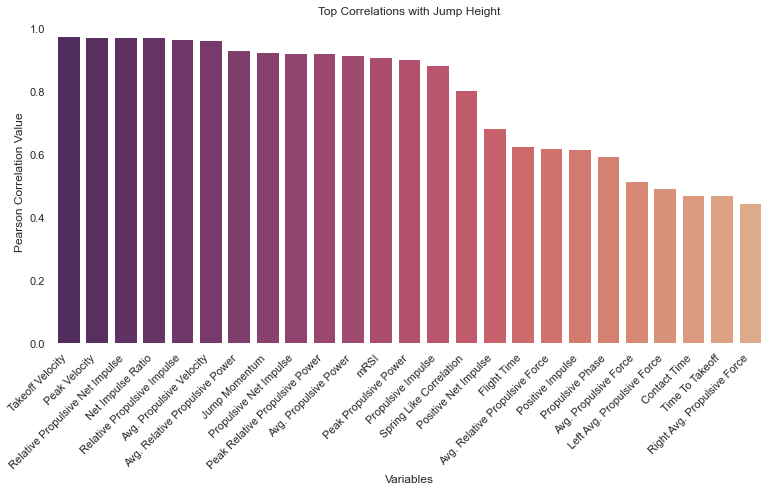

In [359]:
# visualizing jump height correlations
sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.barplot(x = sorted_corr_jump.index, y = sorted_corr_jump.values, palette = "flare_r")
sns.despine(left = True, bottom = True)

plt.xlabel('Variables')
plt.ylabel('Pearson Correlation Value')
plt.title('Top Correlations with Jump Height')
plt.xticks(rotation = 45, ha = 'right') 
plt.tight_layout()

plt.show()

The strongest linear associations to `Jump Height` are measures relating to propulsion (i.e. `Takeoff Velocity`, Propulsive Impulse, Velocity, Power, `Jump Momentum`, `Spring Like Correlation`). 
Now checking RSI correlations.

In [360]:
# testing correlations for RSI 
corr_RSI = DJ.corr()['RSI'].abs().dropna()
sorted_corr_RSI = corr_RSI.sort_values(ascending = False)[1:26]
print(sorted_corr_RSI)

Avg. Braking RFD                        0.905425
Stiffness                               0.895868
Left Avg. Braking RFD                   0.895816
Right Avg. Braking RFD                  0.890346
Relative Force At Min Displacement      0.878397
Peak Relative Propulsive Force          0.871798
Force At Min Displacement               0.861791
Avg. Relative Braking Power             0.857511
Peak Propulsive Force                   0.855723
Avg. Relative Braking Force             0.842492
Contact Time                            0.831055
Time To Takeoff                         0.831055
Right Force at Peak Propulsive Force    0.826477
Left Force at Peak Propulsive Force     0.814347
Avg. Braking Power                      0.796007
Relative Braking Impulse                0.795843
Propulsive Phase                        0.790100
Braking Phase                           0.788523
Avg. Braking Force                      0.786613
Left Avg. Braking Force                 0.717008
Right Avg. Braking F

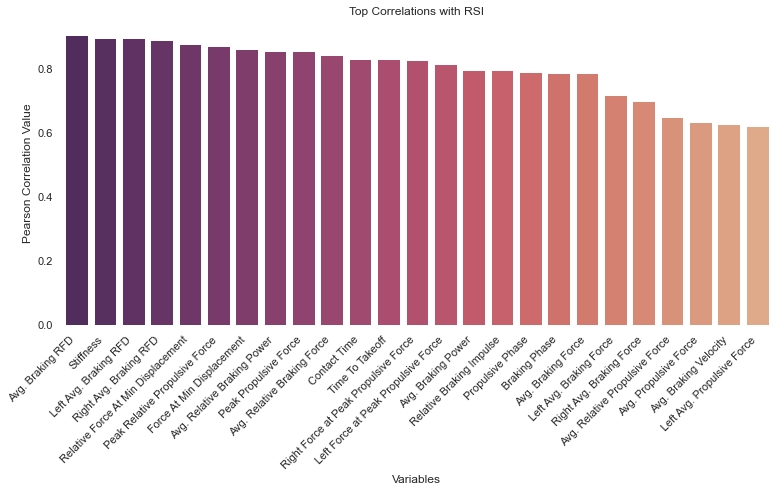

In [361]:
# visualizing RSI correlations
sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.barplot(x = sorted_corr_RSI.index, y = sorted_corr_RSI.values, palette = "flare_r")
sns.despine(left = True, bottom = True)

plt.xlabel('Variables')
plt.ylabel('Pearson Correlation Value')
plt.title('Top Correlations with RSI')
plt.xticks(rotation = 45, ha = 'right') 
plt.tight_layout()

plt.show()

For `RSI`, measures relating to force timings have the strongest linear associations (i.e. `Avg. Braking RFD`, `Time to Takeoff`, as well as `Stiffness`). `Contact Time` was not included since RSI is calculation of Jump Height over Contact Time.

In [362]:
# isometric test correlation matrix
corr_ISO = ISO.corr()
corr_ISO

,Segment,Excluded,System Weight,Initiation Threshold,Peak Force,Net Peak Force,Relative Peak Force,Relative Peak Force (BW),L|R Peak Force,Left Peak Force,...,Relative Force at 250 ms,Relative Force at 250 ms (BW),RFD 0-250 ms,Left Force at 250 ms,Right Force at 250 ms,Impulse 0-250ms,Net Impulse 0-250ms,Length of Pull,Time to Peak Force,Peak RFD
Segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excluded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
System Weight,NaN,NaN,1.000000,0.100411,0.526555,0.405204,0.083428,-0.091820,-0.146713,0.394583,...,0.226848,0.117153,0.369569,0.470687,0.502432,0.472532,0.115498,0.061588,0.134863,0.110864
Initiation Threshold,NaN,NaN,0.100411,1.000000,-0.036287,-0.055193,-0.093109,-0.065696,0.035273,-0.015517,...,0.094126,0.113410,0.058064,0.106601,0.101811,0.233009,0.220739,-0.448514,-0.115122,0.026790
Peak Force,NaN,NaN,0.526555,-0.036287,1.000000,0.990583,0.889819,0.767713,-0.069195,0.873182,...,0.423602,0.322071,0.474216,0.466989,0.532784,0.485160,0.327196,0.248791,0.128652,0.335371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Impulse 0-250ms,NaN,NaN,0.472532,0.233009,0.485160,0.445634,0.320485,0.283815,-0.013437,0.425258,...,0.625929,0.596446,0.658784,0.615241,0.713685,1.000000,0.929992,-0.154475,-0.111880,0.310229
Net Impulse 0-250ms,NaN,NaN,0.115498,0.220739,0.327196,0.333260,0.326415,0.358178,0.046047,0.314725,...,0.610856,0.623378,0.588360,0.497109,0.594822,0.929992,1.000000,-0.199792,-0.182347,0.303413
Length of Pull,NaN,NaN,0.061588,-0.448514,0.248791,0.257627,0.259219,0.238008,-0.061532,0.190151,...,0.000324,-0.020962,0.034119,-0.001895,0.048882,-0.154475,-0.199792,1.000000,0.226149,0.003882
Time to Peak Force,NaN,NaN,0.134863,-0.115122,0.128652,0.116631,0.080954,0.004668,0.043152,0.148507,...,0.139985,0.095069,0.163324,0.180314,0.140708,-0.111880,-0.182347,0.226149,1.000000,-0.849986


Checking Isometric Mid-Thigh Pull Test correlations next.

In [398]:
# top correlations for peak force
corr_PF = ISO.corr()['Peak Force'].abs().dropna()
sorted_corr_PF = corr_PF.sort_values(ascending = False)[1:26]
print(sorted_corr_PF)

Net Peak Force                 0.990583
Right Peak Force               0.893638
Relative Peak Force            0.889819
Left Peak Force                0.873182
Relative Peak Force (BW)       0.767713
Relative Force at 0 ms (BW)    0.589188
Force at 200 ms                0.548007
Right Force at 250 ms          0.532784
System Weight                  0.526555
Force at 250 ms                0.523632
Left Force at 200 ms           0.517892
Right Force at 200 ms          0.508300
Force at 0 ms                  0.494742
Impulse 0-250ms                0.485160
RFD 0-250 ms                   0.474216
Net Force at 250 ms            0.471187
Left Force at 250 ms           0.466989
RFD 0-200 ms                   0.462276
Net Force at 200 ms            0.460555
Relative Force at 250 ms       0.423602
Right Force at 0 ms            0.411023
Relative Force at 200 ms       0.397866
Force at 150 ms                0.382560
Impulse 0-200ms                0.371988
Right Force at 150 ms          0.358429


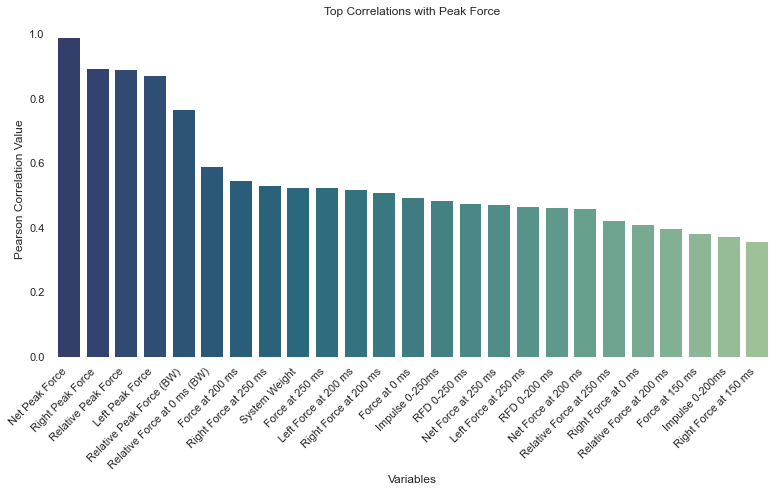

In [399]:
# visualizing peak force correlations
sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.barplot(x = sorted_corr_PF.index, y = sorted_corr_PF.values, palette = "crest_r")
sns.despine(left = True, bottom = True)

plt.xlabel('Variables')
plt.ylabel('Pearson Correlation Value')
plt.title('Top Correlations with Peak Force')
plt.xticks(rotation = 45, ha = 'right') 
plt.tight_layout()

plt.show()

In [418]:
# top correlations for average RFD
corr_RFD = ISO.corr()['Peak RFD'].abs().dropna()
sorted_corr_RFD = corr_RFD.sort_values(ascending = False)[1:26]
print(sorted_corr_RFD)

Time to Peak Force          0.836168
Right Force at 150 ms       0.483888
Peak Force                  0.479425
Right Peak Force            0.472568
Net Peak Force              0.472308
Force at 150 ms             0.444691
Relative Peak Force (BW)    0.428489
Relative Peak Force         0.421349
Right Force at 100 ms       0.413285
Impulse 0-200ms             0.405741
Impulse 0-250ms             0.391052
Net Force at 150 ms         0.380611
RFD 0-150 ms                0.374512
Left Peak Force             0.367736
Force at 100 ms             0.366567
Impulse 0-150ms             0.362178
Right Force at 0 ms         0.356511
Relative Force at 150 ms    0.326872
Net Impulse 0-200ms         0.323882
Net Impulse 0-250ms         0.318442
RFD 0-100 ms                0.304952
Net Force at 100 ms         0.304468
Right Force at 50 ms        0.299588
Right Force at 200 ms       0.298503
Impulse 0-100ms             0.294535
Name: Peak RFD, dtype: float64


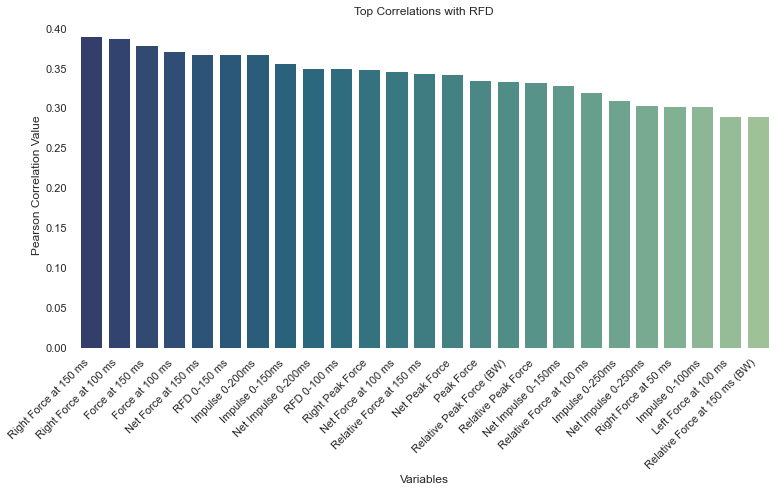

In [369]:
# visualizing RFD correlations
sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.barplot(x = sorted_corr_RFD.index, y = sorted_corr_RFD.values, palette = "crest_r")
sns.despine(left = True, bottom = True)

plt.xlabel('Variables')
plt.ylabel('Pearson Correlation Value')
plt.title('Top Correlations with RFD')
plt.xticks(rotation = 45, ha = 'right') 
plt.tight_layout()

Checking for just strong linear relationships did not reveal much, so the range of top correlation was expanded. For both variables, maintaining strong force at the later stages of the lift (150-250ms) is a good predictor for overall peak force and RFD. Right force is also predictably higher than left force in predicting total force output (standard dominant side imbalances).

Now I'll build baseline models to predict the target metrics. By optimizing a model, it gives insight into related variables that play the largest role in influencing the target metrics. This can add helpful context when making decisions about tempering / managing athlete training in-season to maximize peak performance for the right moments.

## Modeling

Since the target variables are all numeric, the planned approach to modeling involves regression analysis. We begin with a linear model approach, using Multiple Linear Regression in scikit-learn to further evaluate the strength of the features' linear relationships with the targets. Then, we'll use a Decision Tree approach to re-assess feature importance without adhering to strictly linear projections. The idea behind a multi-faceted modeling approach is that it offers different perspectives in testing predictor relationships to the response. 

I'll be evaluating the model performance with **Root Mean Squared Error (RMSE)** as it effectively describes the average distance of actual points from model predictions (error) and it is a popular choice to evaluate regression models (the better the model, the lower the RMSE). To make a final assessment on relevant variables, I'll be observing the selected features for **Feature Importance** as it is a metric in scikit-learn that evaluates how much a feature contributes to the final prediction (better predictors have higher feature importance). 



We start with `Jump Height`, I'll be checking diagnostics prior to fitting a model.

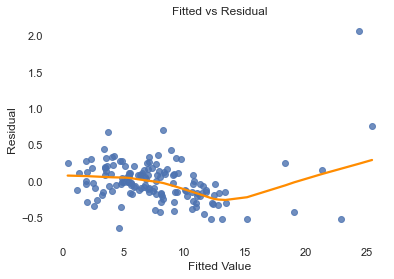

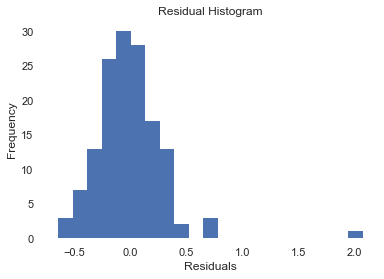

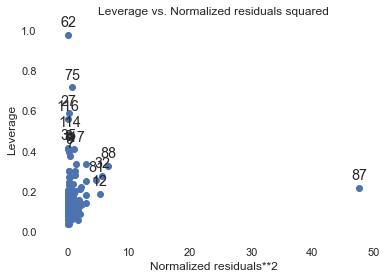

In [371]:
# imports
import statsmodels.api as sm

# set feature matrix and target variable
selected_variables = sorted_corr_jump.index.tolist()
X = DJ[selected_variables]
y = DJ['Jump Height']

# regression model
mod1 = sm.OLS(y, sm.add_constant(X)).fit()

# fitted vs residual plot (linearity and constant variance)
sns.regplot(x = mod1.fittedvalues, y = mod1.resid, lowess = True, line_kws = {'color': "darkorange"})
sns.despine(left = True, bottom = True)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

# residual histogram (normality and independence)
plt.hist(mod1.resid, bins = 21, edgecolor = "none")
sns.despine(left = True, bottom = True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

# leverage residual-squared plot (outliers and influential points)
sm.graphics.plot_leverage_resid2(mod1)
sns.despine(left = True, bottom = True)
plt.show()

Fitting a linear model necessitates the data meets the following assumptions:

**Linearity**

The spread of the points is linear and mostly equally distributed above and below the line in the fitted vs. residual plot. 

In the baseline model, the spread of points around the line is even, though there is a slight curve likely due to outliers, therefore this condition is MET.

**Constant Variance**

In the fitted values vs. residuals plot, the y-axis spread (ie. the resiuals variance) is mostly the same moving from left to right. 

This condition is MET, with the only exceptions being high outliers.

**Normality of Residuals**

The histogram of the residuals below is symmetric and centered around 0. 

This is also MET, again with the exception of outliers.

**Independence**

Observations are independent of each other, residuals should not exhibit any clear patterns or trends over time. Observations were recorded during set testing times, and despite features being related, there is no relation between separate measruements, therefore this condition is also MET

**Multicolinearity**

Predictor variables should not be highly correlated with each other (exhibiting high VIF). This condition is inherently NOT MET, due to the force plate measuring many aspects of the same movement. Features are undeniably related to one another, and the objective of modeling is solely to identify the most relevant supplemental measures.

**Outliers**
There should be few influential points and outliers that greatly impact the overall distribution of observeations. This condition is also NOT MET, high outliers clearly skew the overall distribution and need to be accounted for.

In [372]:
# # removing top influential points from dataset
# influential_indices = [12, 27, 32, 35, 62, 75, 87, 88, 114, 116]

# DJ = DJ.drop(influential_indices, axis = 0)

After checking for assumptions, we **proceed with caution** as the data / variables collected by the Hawkin force plates are typically variants of the same measurement, thus contributing to high multicolinearity. Performing careful feature selection while optimizing the model should resolve this in the context of understanding strong predictor variables.

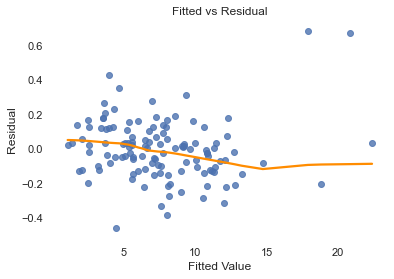

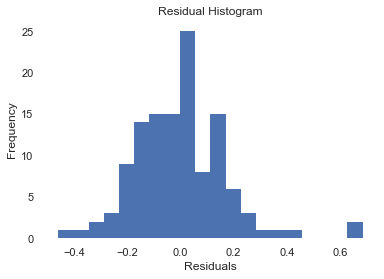

In [170]:
# re-run baseline model diagnostics after removing top outliers
mod1x = sm.OLS(y, sm.add_constant(X)).fit()

# fitted vs residual plot (linearity and constant variance)
sns.regplot(x = mod1x.fittedvalues, y = mod1x.resid, lowess = True, line_kws = {'color': "darkorange"})
sns.despine(left = True, bottom = True)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

# residual histogram (normality and independence)
plt.hist(mod1x.resid, bins = 20, edgecolor = "none")
sns.despine(left = True, bottom = True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

The diagnostic plots have predictably improved after removing outliers.

To effectively evaluate the models, I'll be performing k-fold cross-validation and assessing the average RMSE of the folds. The random selection of examples in cross-validation ensures that the model predicitons are generizable and not just optimized to the current set of data.

In [375]:
# imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# regularized linear model
reg_lm = Lasso(alpha = 0.09, max_iter = 17000).fit(X_train, y_train)
y_pred = reg_lm.predict(X_test)

# model performance metrics
num_selected_features = sum(reg_lm.coef_ != 0)
cv = cross_val_score(reg_lm, X, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = [sqrt(abs(score)) for score in cv]
cv_rmse = sum(rmse) / len(rmse)

print("Number of Selected Features:", num_selected_features)
print("Cross-Validation RMSE:", cv_rmse)

Number of Selected Features: 8
Cross-Validation RMSE: 0.4136844214550047


In [376]:
# selected feature importance
selected_features = X.columns[reg_lm.coef_ != 0]  
feature_importance = reg_lm.coef_[reg_lm.coef_ != 0]  

feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

print(feature_importance_df)

                          Feature  Importance
0          Propulsive Net Impulse    0.072368
1  Peak Relative Propulsive Power    0.071044
2           Avg. Propulsive Power    0.004818
7     Right Avg. Propulsive Force   -0.000952
3           Peak Propulsive Power   -0.000999
6           Avg. Propulsive Force   -0.004568
5  Avg. Relative Propulsive Force   -0.006803
4              Propulsive Impulse   -0.030127


Here, I've fitted a linear regression model with L1 regularization. This technique automatically scales the coefficients in the model to maximize the influence of relevant predictor variables. The model is predictably strong with an average RMSE of .43 (as the features are measures of the same movement), and the most relevant feature is `Peak Relative Propulsive Power`.

Now testing a decision tree modeling approach.

In [377]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# decision tree model
reg_dt = DecisionTreeRegressor(random_state = 27)
reg_dt.fit(X_train, y_train)
y_pred = reg_dt.predict(X_test)

# model performance metrics
num_selected_features = X_train.shape[1] 
cv = cross_val_score(reg_dt, X, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = [sqrt(abs(score)) for score in cv]
cv_rmse = sum(rmse) / len(rmse)

print("Number of Selected Features:", num_selected_features)
print("Cross-Validation RMSE:", cv_rmse)

Number of Selected Features: 25
Cross-Validation RMSE: 0.6128489102679826


In [378]:
# selected feature importance
feature_importance = reg_dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                            Feature    Importance
1                     Peak Velocity  7.290732e-01
10            Avg. Propulsive Power  1.825939e-01
0                  Takeoff Velocity  6.276385e-02
12            Peak Propulsive Power  1.419905e-02
3                 Net Impulse Ratio  3.937434e-03
21       Left Avg. Propulsive Force  3.253786e-03
5          Avg. Propulsive Velocity  2.165270e-03
9    Peak Relative Propulsive Power  5.010260e-04
2   Relative Propulsive Net Impulse  4.267193e-04
13               Propulsive Impulse  2.994052e-04
11                             mRSI  1.969933e-04
24      Right Avg. Propulsive Force  1.838471e-04
6    Avg. Relative Propulsive Power  1.311916e-04
18                 Positive Impulse  7.850831e-05
20            Avg. Propulsive Force  5.928119e-05
16                      Flight Time  3.172954e-05
22                     Contact Time  2.917544e-05
4       Relative Propulsive Impulse  2.382258e-05
7                     Jump Mom

When modeling for `Jump Height` with a decision tree, the model performed slightly worse than the linear model (.56 RMSE), and the strongest weighted feature was `Peak Velocity`, followed by measures of Propulsive Power. These results are in-line with the previous analysis.

Now modeling for `RSI`.

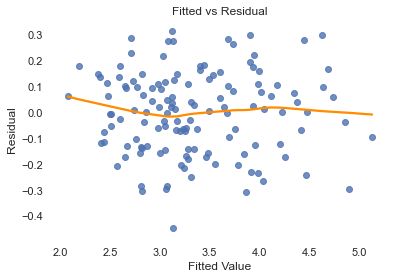

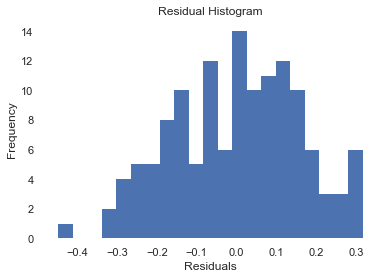

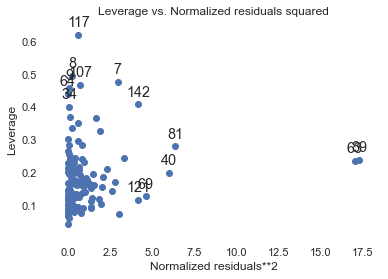

In [379]:
# set feature matrix and target variable
selected_variables = sorted_corr_RSI.index.tolist()
X = DJ[selected_variables]
y = DJ['RSI']

# regression model
mod3 = sm.OLS(y, sm.add_constant(X)).fit()

# fitted vs residual plot (linearity and constant variance)
sns.regplot(x = mod3.fittedvalues, y = mod3.resid, lowess = True, line_kws = {'color': "darkorange"})
sns.despine(left = True, bottom = True)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

# residual histogram (normality and independence)
plt.hist(mod3.resid, bins = 21, edgecolor = "none")
sns.despine(left = True, bottom = True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

# leverage residual-squared plot (outliers and influential points)
sm.graphics.plot_leverage_resid2(mod1)
sns.despine(left = True, bottom = True)
plt.show()

Based on the diagnostics, the **Linearity**, **Constant Variance**, **Independence** conditions are MET. **Multicollinearity** is expected and **Outliers** will be removed. Therfore we **proceed with caution**.

In [381]:
# # removing top influential points from dataset
# influential_indices = [45, 49, 61, 63, 64, 67, 80, 89, 98, 113, 117]

# DJ = DJ.drop(influential_indices, axis = 0)

In [382]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# regularized linear model
reg_lm = Lasso(alpha = 0.09, max_iter = 57000).fit(X_train, y_train)
y_pred = reg_lm.predict(X_test)

# model performance metrics
num_selected_features = sum(reg_lm.coef_ != 0)
cv = cross_val_score(reg_lm, X, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = [sqrt(abs(score)) for score in cv]
cv_rmse = sum(rmse) / len(rmse)

print("Number of Selected Features:", num_selected_features)
print("Cross-Validation RMSE:", cv_rmse)

Number of Selected Features: 13
Cross-Validation RMSE: 0.2548077784890602


In [383]:
# selected feature importance
selected_features = X.columns[reg_lm.coef_ != 0]  
feature_importance = reg_lm.coef_[reg_lm.coef_ != 0]  

feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

print(feature_importance_df)

                                Feature  Importance
6           Avg. Relative Braking Force    0.007514
12           Left Avg. Propulsive Force    0.001696
5             Force At Min Displacement    0.000617
2                 Left Avg. Braking RFD    0.000014
0                      Avg. Braking RFD    0.000010
1                             Stiffness   -0.000013
3                Right Avg. Braking RFD   -0.000045
11                Avg. Propulsive Force   -0.000205
8                    Avg. Braking Power   -0.000695
10              Left Avg. Braking Force   -0.000813
7   Left Force at Peak Propulsive Force   -0.000846
9                    Avg. Braking Force   -0.001138
4        Peak Relative Propulsive Force   -0.001183


In [384]:
# decision tree model
reg_dt = DecisionTreeRegressor(random_state = 27)
reg_dt.fit(X_train, y_train)
y_pred = reg_dt.predict(X_test)

# model performance metrics
num_selected_features = X_train.shape[1] 
cv = cross_val_score(reg_dt, X, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = [sqrt(abs(score)) for score in cv]
cv_rmse = sum(rmse) / len(rmse)

print("Number of Selected Features:", num_selected_features)
print("Cross-Validation RMSE:", cv_rmse)

Number of Selected Features: 25
Cross-Validation RMSE: 0.3110327086662717


In [385]:
# selected feature importance
feature_importance = reg_dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                                 Feature  Importance
4     Relative Force At Min Displacement    0.660451
10                          Contact Time    0.109958
0                       Avg. Braking RFD    0.094106
21        Avg. Relative Propulsive Force    0.032241
19               Left Avg. Braking Force    0.029995
11                       Time To Takeoff    0.018989
5         Peak Relative Propulsive Force    0.010988
23                 Avg. Braking Velocity    0.007406
17                         Braking Phase    0.005998
13   Left Force at Peak Propulsive Force    0.005468
16                      Propulsive Phase    0.004463
3                 Right Avg. Braking RFD    0.004457
8                  Peak Propulsive Force    0.003015
24            Left Avg. Propulsive Force    0.002545
20              Right Avg. Braking Force    0.002429
22                 Avg. Propulsive Force    0.001732
7            Avg. Relative Braking Power    0.001595
18                    Avg.

The regression model with L1 regularization performed well (RMSE = .27), and the most relevant feature was `Avg. Relative Braking Force`.  The decision tree model performed similarly to the linear model (RMSE = .29), and the highest scoring feature is `Relative Force at Min Displacement`. 

When looking at both models, measures of Force at Min Displacement and Relative Braking Force were strong predictors for both.

Now modeling for `Peak Force` in the Isometric Mid-Thigh Pull Test data.

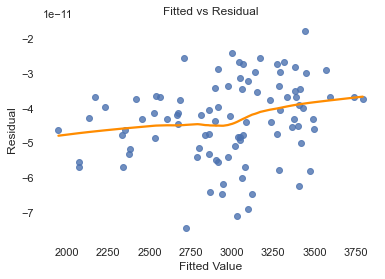

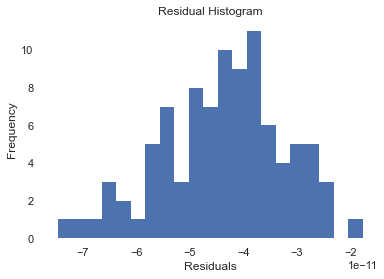

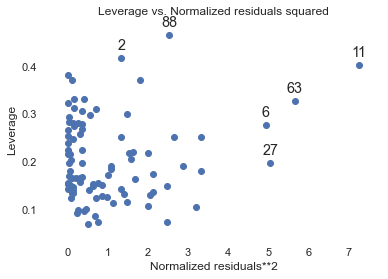

In [405]:
# set feature matrix and target variable
selected_variables = sorted_corr_PF.index.tolist()
X = ISO[selected_variables]
y = ISO['Peak Force']

# regression model
mod3 = sm.OLS(y, sm.add_constant(X)).fit()

# fitted vs residual plot (linearity and constant variance)
sns.regplot(x = mod3.fittedvalues, y = mod3.resid, lowess = True, line_kws = {'color': "darkorange"})
sns.despine(left = True, bottom = True)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

# residual histogram (normality and independence)
plt.hist(mod3.resid, bins = 21, edgecolor = "none")
sns.despine(left = True, bottom = True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

# leverage residual-squared plot (outliers and influential points)
sm.graphics.plot_leverage_resid2(mod3)
sns.despine(left = True, bottom = True)
plt.show()


In [403]:
# # removing top influential points from dataset
# influential_indices = [20, 30, 46, 56, 74, 81]

# ISO = ISO.drop(influential_indices, axis = 0)

Based on the diagnostics, the **Linearity**, **Independence** and **Outliers** conditions are MET. **Multicollinearity** is expected, but **Constant Variance** is NOT MET, since despite a symmetrical and constant distribution of residuals, they are not centered around 0. Therfore we **proceed with caution**.

In [406]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# regularized linear model
reg_lm = Lasso(alpha = 0.07, max_iter = 17000).fit(X_train, y_train)
y_pred = reg_lm.predict(X_test)

# model performance metrics
num_selected_features = sum(reg_lm.coef_ != 0)
cv = cross_val_score(reg_lm, X, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = [sqrt(abs(score)) for score in cv]
cv_rmse = sum(rmse) / len(rmse)

print("Number of Selected Features:", num_selected_features)
print("Cross-Validation RMSE:", cv_rmse)

Number of Selected Features: 18
Cross-Validation RMSE: 0.03867827213203513


In [407]:
# selected feature importance
selected_features = X.columns[reg_lm.coef_ != 0]  
feature_importance = reg_lm.coef_[reg_lm.coef_ != 0]  

feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

print(feature_importance_df)

                  Feature  Importance
0          Net Peak Force    0.973046
6           System Weight    0.954109
4         Force at 200 ms    0.067976
5   Right Force at 250 ms    0.030672
14   Left Force at 250 ms    0.030619
1        Right Peak Force    0.027387
3         Left Peak Force    0.027377
12           RFD 0-250 ms    0.004989
17        Force at 150 ms    0.000009
11        Impulse 0-250ms   -0.000114
10          Force at 0 ms   -0.001698
2     Relative Peak Force   -0.003812
15           RFD 0-200 ms   -0.004435
13    Net Force at 250 ms   -0.005552
16    Net Force at 200 ms   -0.011535
8    Left Force at 200 ms   -0.034212
9   Right Force at 200 ms   -0.034308
7         Force at 250 ms   -0.045049


In [408]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# decision tree model
reg_dt = DecisionTreeRegressor(random_state = 27)
reg_dt.fit(X_train, y_train)
y_pred = reg_dt.predict(X_test)

# model performance metrics
num_selected_features = X_train.shape[1] 
cv = cross_val_score(reg_dt, X, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = [sqrt(abs(score)) for score in cv]
cv_rmse = sum(rmse) / len(rmse)

print("Number of Selected Features:", num_selected_features)
print("Cross-Validation RMSE:", cv_rmse)

Number of Selected Features: 25
Cross-Validation RMSE: 97.10179750997504


In [409]:
# selected feature importance
feature_importance = reg_dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                        Feature    Importance
0                Net Peak Force  9.656638e-01
24        Right Force at 150 ms  1.851982e-02
1              Right Peak Force  4.812122e-03
13              Impulse 0-250ms  2.126824e-03
7         Right Force at 250 ms  1.954163e-03
15          Net Force at 250 ms  1.537090e-03
8                 System Weight  1.440296e-03
4      Relative Peak Force (BW)  8.041877e-04
16         Left Force at 250 ms  7.722094e-04
6               Force at 200 ms  6.963837e-04
20          Right Force at 0 ms  5.678835e-04
10         Left Force at 200 ms  3.792631e-04
11        Right Force at 200 ms  3.238421e-04
22              Force at 150 ms  1.221290e-04
2           Relative Peak Force  8.657677e-05
23              Impulse 0-200ms  4.966163e-05
5   Relative Force at 0 ms (BW)  4.871668e-05
19     Relative Force at 250 ms  3.310775e-05
3               Left Peak Force  3.112819e-05
21     Relative Force at 200 ms  1.345002e-05
18          Ne

The linear model performs extremely well due to many variations of `Peak Force` existing in the dataset (RMSE = .03), while the decision tree model is less effective (RMSE = 97). The top predictor of peak force is `Force at 200 ms` when assessing both models.

Repeating the process for the last target metric `Peak RFD`.

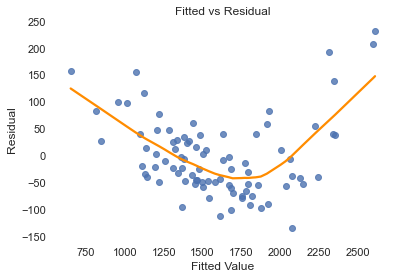

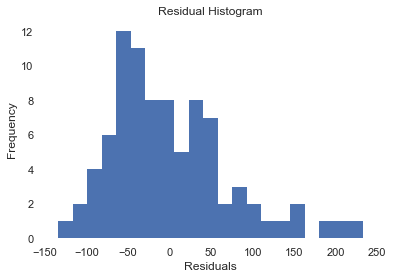

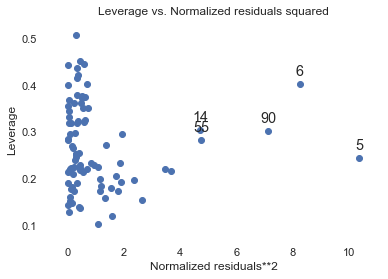

In [419]:
# Set feature matrix and target variable
selected_variables = sorted_corr_RFD.index.tolist()
X = ISO[selected_variables]  # Assuming ISO is your DataFrame containing features
y = ISO['Peak RFD']

# Regression model
mod4 = sm.OLS(y, sm.add_constant(X)).fit()

# Fitted vs Residual Plot (Linearity and Constant Variance)
sns.regplot(x = mod4.fittedvalues, y = mod4.resid, lowess = True, line_kws = {'color': "darkorange"})
sns.despine(left = True, bottom = True)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

# Residual Histogram (Normality and Independence)
plt.hist(mod4.resid, bins=21, edgecolor = "none")
sns.despine(left = True, bottom = True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

# leverage residual-squared plot (outliers and influential points)
sm.graphics.plot_leverage_resid2(mod4)
sns.despine(left = True, bottom = True)
plt.show()


Based on the diagnostics, the **Constant Variance**, **Independence** and **Outliers** conditions are MET. **Multicollinearity** is expected, but **Linearity** is NOT MET as there is a clear curve in the fitted vs residual plot. Therfore we **proceed with caution**.

In [420]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# regularized linear model
reg_lm = Lasso(alpha = 0.07, max_iter = 177000).fit(X_train, y_train)
y_pred = reg_lm.predict(X_test)

# model performance metrics
num_selected_features = sum(reg_lm.coef_ != 0)
cv = cross_val_score(reg_lm, X, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = [sqrt(abs(score)) for score in cv]
cv_rmse = sum(rmse) / len(rmse)

print("Number of Selected Features:", num_selected_features)
print("Cross-Validation RMSE:", cv_rmse)

/Users/mithilguru/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.653e+04, tolerance: 1.173e+03
  model = cd_fast.enet_coordinate_descent(
/Users/mithilguru/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.912e+05, tolerance: 1.109e+03
  model = cd_fast.enet_coordinate_descent(
/Users/mithilguru/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

Number of Selected Features: 25
Cross-Validation RMSE: 109.82559060376794


/Users/mithilguru/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+05, tolerance: 8.179e+02
  model = cd_fast.enet_coordinate_descent(


In [421]:
# selected feature importance
feature_importance = reg_lm.coef_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

print(feature_importance_df)

                     Feature  Importance
18       Net Impulse 0-200ms    7.932631
1      Right Force at 150 ms    1.703014
5            Force at 150 ms    1.549356
19       Net Impulse 0-250ms    1.396978
22      Right Force at 50 ms    0.810984
11       Net Force at 150 ms    0.736147
21       Net Force at 100 ms    0.619169
2                 Peak Force    0.521860
9            Impulse 0-200ms    0.243429
20              RFD 0-100 ms    0.058230
4             Net Peak Force    0.054896
3           Right Peak Force    0.022195
10           Impulse 0-250ms    0.005753
7        Relative Peak Force    0.002612
13           Left Peak Force   -0.005417
12              RFD 0-150 ms   -0.123264
14           Force at 100 ms   -0.375488
23     Right Force at 200 ms   -0.496323
8      Right Force at 100 ms   -1.306494
16       Right Force at 0 ms   -1.777619
24           Impulse 0-100ms   -3.027521
6   Relative Peak Force (BW)   -6.772915
15           Impulse 0-150ms  -12.851995
17  Relative For

In [422]:
# decision tree model
reg_dt = DecisionTreeRegressor(random_state = 27)
reg_dt.fit(X_train, y_train)
y_pred = reg_dt.predict(X_test)

# model performance metrics
num_selected_features = X_train.shape[1] 
cv = cross_val_score(reg_dt, X, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = [sqrt(abs(score)) for score in cv]
cv_rmse = sum(rmse) / len(rmse)

print("Number of Selected Features:", num_selected_features)
print("Cross-Validation RMSE:", cv_rmse)

Number of Selected Features: 25
Cross-Validation RMSE: 221.70725066942796


In [423]:
# selected feature importance
feature_importance = reg_dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                     Feature    Importance
0         Time to Peak Force  6.058176e-01
4             Net Peak Force  1.692664e-01
5            Force at 150 ms  1.509062e-01
11       Net Force at 150 ms  1.900346e-02
10           Impulse 0-250ms  1.678729e-02
3           Right Peak Force  1.486916e-02
2                 Peak Force  9.611232e-03
15           Impulse 0-150ms  3.650242e-03
19       Net Impulse 0-250ms  3.066799e-03
23     Right Force at 200 ms  2.543480e-03
24           Impulse 0-100ms  1.077862e-03
18       Net Impulse 0-200ms  1.064384e-03
7        Relative Peak Force  6.996436e-04
8      Right Force at 100 ms  5.685905e-04
17  Relative Force at 150 ms  3.513382e-04
6   Relative Peak Force (BW)  2.329340e-04
16       Right Force at 0 ms  2.318230e-04
9            Impulse 0-200ms  2.231163e-04
14           Force at 100 ms  2.406644e-05
21       Net Force at 100 ms  3.783788e-06
1      Right Force at 150 ms  6.470117e-07
13           Left Peak Force  1.25

The linear model with regularization (RMSE = 109) outperformed the decision tree model (RMSE = 221), but `Net Impulse 0-250ms` was the most relevant feature across both models. 

## Results

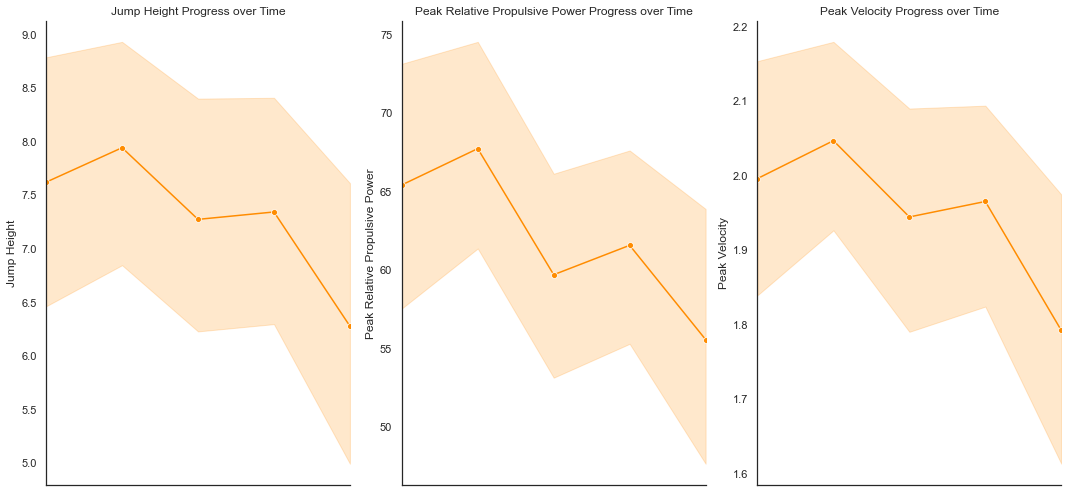

In [448]:
# influential factors - jump height
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

for ax, col in zip(axes, ['Jump Height', 'Peak Relative Propulsive Power', 'Peak Velocity']):
    sns.lineplot(x = 'Date', y = col, data = DJ, marker = "o", color = "darkorange", ax = ax)
    ax.set(xlabel = '', ylabel = col, title = f'{col} Progress over Time', xticks = [], xlim = (DJ['Date'].min(), DJ['Date'].max()))

sns.despine()

plt.tight_layout()
plt.show()


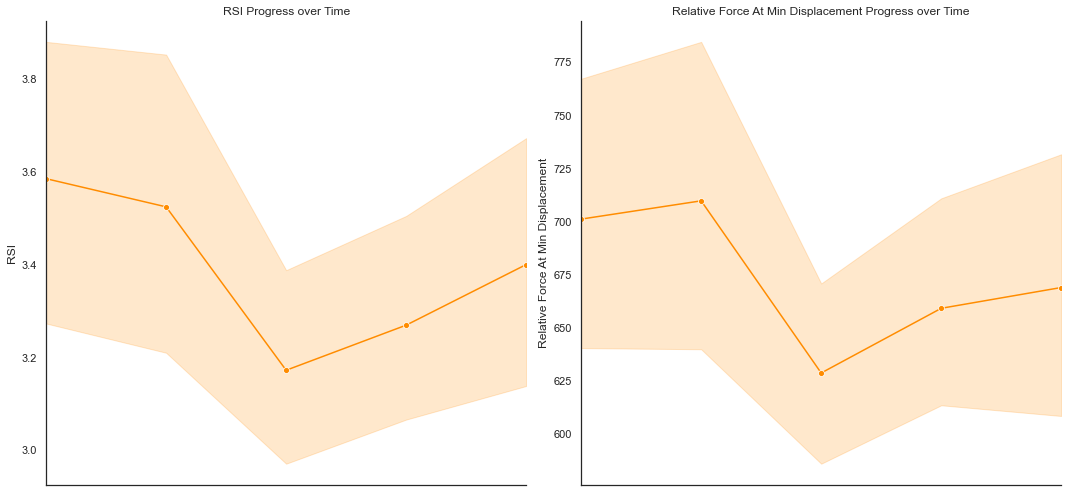

In [451]:
# influential factors - RSI
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

for ax, col in zip(axes, ['RSI', 'Relative Force At Min Displacement']):
    sns.lineplot(x = 'Date', y = col, data = DJ, marker = "o", color = "darkorange", ax = ax)
    ax.set(xlabel = '', ylabel = col, title = f'{col} Progress over Time', xticks = [], xlim = (DJ['Date'].min(), DJ['Date'].max()))

sns.despine()

plt.tight_layout()
plt.show()


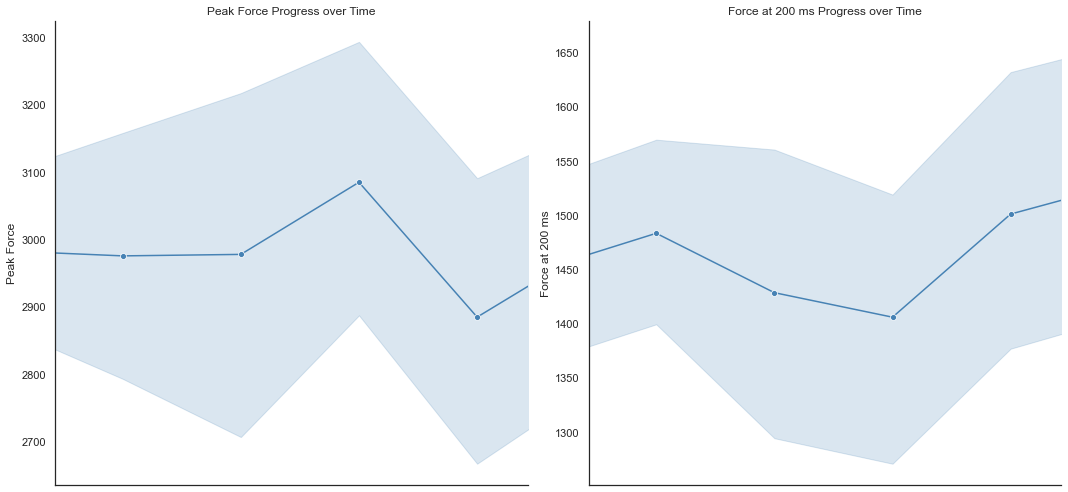

In [465]:
# influential factors - peak force
fig, axes = plt.subplots(1, 2, figsize = (15, 7))

for ax, col in zip(axes, ['Peak Force', 'Force at 200 ms']):
    sns.lineplot(x = 'Date', y = col, data = ISO, marker = "o", color = "steelblue", ax = ax)
    ax.set(xlabel = '', ylabel = col, title = f'{col} Progress over Time', xticks = [], xlim = (DJ['Date'].min(), DJ['Date'].max()))

sns.despine()

plt.tight_layout()
plt.show()

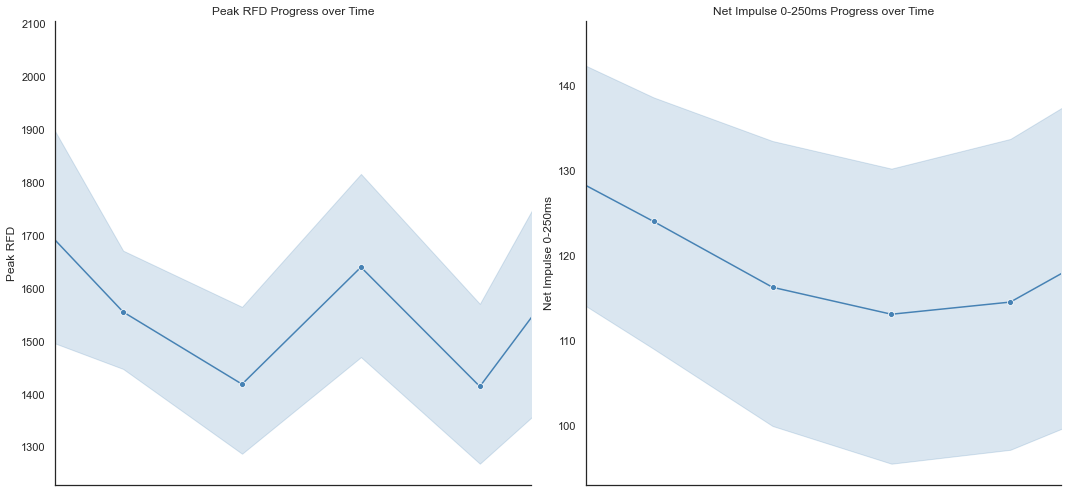

In [460]:
# influential factors - peak RFD
fig, axes = plt.subplots(1, 2, figsize = (15, 7))

for ax, col in zip(axes, ['Peak RFD', 'Net Impulse 0-250ms']):
    sns.lineplot(x = 'Date', y = col, data = ISO, marker = "o", color = "steelblue", ax = ax)
    ax.set(xlabel = '', ylabel = col, title = f'{col} Progress over Time', xticks = [], xlim = (DJ['Date'].min(), DJ['Date'].max()))

sns.despine()

plt.tight_layout()
plt.show()

Displayed above are the target metrics and influential factors of the Drop Jump and Isometric Mid-Thigh Pull tests visualized over testing period. As evidenced by the correlations, models, and trends over time, these are highly-related measures and are best used in conjunction to form a more complete picture of an athlete's training progress. A likely use-case would be considering these supplementary factors in addition to the standard target metrics when deciding on tapering athletes prior for meets / events.

### Discussion

As sports science continues to become an integral part of the overall training regimen for athletes worldwide, it's become increasingly important to understand the full extent of performance technology such as the Hawkin Force Plates system. With vast amounts of data at hand, accurately deciphering key metrics emerges as a pivotal task in strength coaching. 

Analyzing the Illinois Men's Gymnastics Drop Jump and Isometric Mid-Thigh Pull tests unveils the following insights: 
* For Drop Jumps, along with `Jump Height` and `RSI`, `Peak Relative Propulsive Force`, `Peak Velocity`, and `Relative Force at Min Displacement` offer vital context for assessing athlete performance
* In the Isometric Mid-Thigh Pull, `Force at 200 ms` and `Net Impulse 0-250ms` complement `Peak Force` and `RFD`.

A modeling limitation arises from the tightly interconnected variables collected by the force plates. This added challenge to understanding the relevance of individual measures, as models sought performance balance while retaining fundamental features (since the aim was feature evaluation). Modeling solely for precise target metric prediction (e.g., `Jump Height`, `RSI`, `Peak Force`, `Peak RFD`) neccisates a distinct approach focused on reducing the dimensionality of the dataset and collecting more data in frequent intervals to optimize model strength. Exploring this avenue would be an exciting approach for future analysis, particularly in evaluating training approaches for optimizing test performances.